Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [3]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/TDDI2022
'aramaProjesiKategoriBulmaKANUN (1).ipynb'
 aramaProjesiKategoriBulmaKHK.ipynb
'aramaProjesiKategoriBulmaÖzelge (1).ipynb'
 aramaProjesiKategoriBulmaÖzelge.ipynb
 aramaProjesiKategoriBulmaYonetmelik.ipynb
 aramaProjesiKHKdoldurma.ipynb
 aramaProjesiVeriIsleme.ipynb
 aramaProjesiVeriIsleme_KHK_TDDIsiz.ipynb
 kanunum-nlp-doc-analysis-dataset.csv
 kanunum-nlp-doc-analysis-dataset.csv.gsheet


Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **kanunum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [4]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4142 non-null   int64  
 1   kategori        4142 non-null   object 
 2   baslik          4142 non-null   object 
 3   rega_no         2527 non-null   object 
 4   mukerrer_no     3642 non-null   float64
 5   rega_tarihi     2527 non-null   object 
 6   kurum           2488 non-null   object 
 7   mevzuat_no      1091 non-null   object 
 8   belge_sayi      43 non-null     object 
 9   mevzuat_tarihi  1905 non-null   object 
 10  donem           500 non-null    object 
 11  sira_no         500 non-null    object 
 12  madde_sayisi    4142 non-null   int64  
 13  data_text       4142 non-null   object 
 14  url             4142 non-null   object 
 15  kanunum_url     4142 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 517.9+ KB


Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğu ekrana yazdırılacaktır.

In [ ]:
print(df.groupby('kategori').size())

Veriler üzerinde yaptığımız ön çalışmada (ekrana data_text sütunundan / alanından bir kaç satır yazdırılmış ve içerikleri incelenmiştir) veri kümesinin data_text sütunundaki / alanındaki içerik iki parçaya ayrılabileceği görülmüştür. Böylelikle data_text sütunu / alanı işlenirken belgeye ait bilgiler birinci parçada belgenin içeriği ikinci parçada görülebilir. Tüm data_text kayıtlarında yer alan ortak bir noktanın varlığını kontrol etmek için aşağıdaki kod yardımı ile "Resmi belgelerin hepsinde 'Madde 1' verisi var mı?" önermesinin doğruluğunu kontrol edeceğiz!

In [ ]:
kayitSayisi = 91say = 0
satirToplami, sutunToplami = df.shape
for satir in range(satirToplami):
  if df['data_text'][satir].find('Madde 1 -') != -1 and df['kategori'][satir] == 'Kanun Hükmünde Kararname':
    say+=1
if say==kayitSayisi:
  print(say,'=',kayitSayisi,'yani data_text alanındaki toplam Kanun Hükmünde Kararname belgesi sayısı ve her bir kayıtta "Madde 1 -" verisini içeren Kanun Hükmünde Kararname belgelerinin sayısı birbirine eşittir.')
else:
  print('Tüm Kanun Hükmünde Kararname belgelerinde aranan veri bulunamamıştır.')

Yukarıdaki bulgular doğrultusunda örnek bir kaydı ikiye bölerek **belge ile ilgili verileri toplayabileceğimiz baş kısmı** görelim. Yine bu baş kısmın **belge türü** ile ilgili bilgi içerip içermediğini görmek için kategori alanındaki veriyi de ekrana yazdıralım.

In [ ]:
satir = 826
print('Kategori:',df['kategori'][satir],'\n',35*'-','\nİçerik:',df['data_text'][satir][:df['data_text'][satir].find('Madde 1')],sep='')

Kategori:Kanun Hükmünde Kararname
-----------------------------------
İçerik:Resmî Gazete Tarihi: 30.06.1989 Resmî Gazete Sayısı: 20211 Mükerrer
Karar Sayısı : KHK/375
Kararnamenin Tarihi : 27/6/1989
451

657 SAYILI DEVLET MEMURLARI KANUNU,926 SAYILI TÜRK SİLAHLI KUVVETLERİ PERSONEL KANUNU,2802 SAYILI HAKİMLER VE SAVCILAR KANUNU,2914 SAYILI YÜKSEKÖĞRETİM PERSONEL KANUNU,5434 SAYILI T.C. EMEKLİ SANDIĞI KANUNU İLE DİĞER BAZI KANUN VE KANUN HÜKMÜNDE KARARNAMELERDE DEĞİŞİKLİK YAPILMASI,DEVLET MEMURLARI VE DİĞER KAMU GÖREVLİLERİNE MEMURİYET TABAN AYLIĞI VE KIDEM AYLIĞI İLE EK TAZMİNAT ÖDENMESİ HAKKINDA KANUN HÜKMÜNDE KARARNAME




Kanun Hükmünde Kararname (KHK) olarak kategori edilen toplam 91 adet kayıt vardı. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturup veriyi burada analiz etmek ve analizimizin sonucunu mevcut 91 kayıttan kaçında doğru sonuç veridğini kontrol etmek yöntemimizin doğruluğu hakkında bize bilgi verecektir.

In [5]:
# KHK için kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulKHK(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında Mevzuat No'yu oluşturan parçalardan biri olan "KHK" ifadesi varsa o bir KHK'dır önermesini kontrol ediyoruz!
  if verilenMetin.find('KHK')!=-1:
    return 'Kanun Hükmünde Kararname'
  # Başlık içinde arama yapan alternatif yöntemler de denenebilir!!!

# 91 kayıt arasında kaç tanesinin KHK olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece KHK kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Kanun Hükmünde Kararname':
    continue
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  if kategoriBulKHK(arastirilacakParca)!=df['kategori'][satir]:
    hataSayisi+=1

print(hataSayisi)

0


Kanun Hükmünde Kararname kategorisnde bulduğumuz yöntemin 0 hata ile çalıştığını gördük. Karmaşıklık matrisi ile bu yöntemimizin ne kadar doğru çalıştığını Kanun kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [6]:
# KHK için kategori bulmak amacıyla kullanılan fonksiyonumuz
def kategoriBulKHK(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında Mevzuat No'yu oluşturan parçalardan biri olan "KHK" ifadesi varsa o bir kanundur önermesini kontrol ediyoruz!
  if verilenMetin.find('KHK')!=-1:
    return 'Kanun Hükmünde Kararname'
  else:
    return 'Kanun Hükmünde Kararname Değil'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

# Sadece KHK kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  fonksiyonumuzunCiktisi = kategoriBulKHK(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Kanun Hükmünde Kararname' and df['kategori'][satir]=='Kanun Hükmünde Kararname':
    # Fonksiyonumuz KHK olan kategoriyi KHK olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Kanun Hükmünde Kararname Değil' and df['kategori'][satir]=='Kanun Hükmünde Kararname':
    # Fonksiyonumuz KHK olan kategoriyi KHK olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Kanun Hükmünde Kararname' and df['kategori'][satir]!='Kanun Hükmünde Kararname':
    # Fonksiyonumuz KHK olmayan kategoriyi KHK olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz KHK olmayan kategoriyi KHK olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Accuracy:',(TP + TN) / satirToplami)
print('Precision:',TP / (TP+FP) )
print('Sensitivity (Recall):',TP / (TP+FN) )
print('Specificity:',TN / (TN+FP) )
print('F-score (F1 Skore):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

4142
91 4018 33 0
Accuracy: 0.9920328343795268
Precision: 0.7338709677419355
Sensitivity (Recall): 1.0
Specificity: 0.9918538632436436
F-score (F1 Skore): 0.8505075137880636


Bulunan TP, TN, FP ve FN değerlerine göre Karmaşıklık Matrisi görselleştirilecektir.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

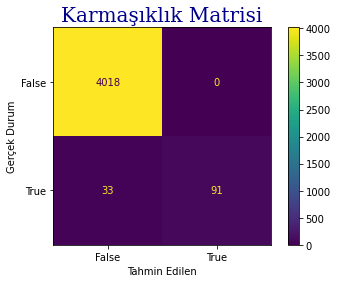

In [7]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulKHK** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.,

- 91 Kanun Hükmünde Kararname belgesinin hepsini Kanun Hükmünde Kararname belgesi türü olarak tespit etmiştir.
- 33 Kanun Hükmünde Kararname belgesi olmayan belgeyi de Kanun Hükmünde Kararname belgesi olarak tespit etmiştir.
- 4018 Kanun Hükmünde Kararname belgesi olmayan belgeyi de Kanun Hükmünde Kararname belgesi olmayan belge olarak tespit etmiştir.
- Kural bazlı yöntemimiz için hesaplamalar aşağıdaki gibi olmuştur.
  - **Doğruluk (Accuracy):** 0.9920328343795268
  - **Keskinlik (Precision):** 0.7338709677419355
  - **Hassasiyet (Sensitivity) / Duyarlılık (Recall):** 1.0
  - **Özgüllük (Specificity):** 0.9918538632436436
  - **F1-Puanı (F1 Score):** 0.8505075137880636
